In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1 = pd.read_excel("Final_NSE___Project_dataset (1).xlsx", sheet_name='Diamond _jew and Hospitality')
df1

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%)
0,Dimond & Jewellers,Titan Company,Dimond & Jewellers,2023-12-20,3554.10,3610.45,3651.50,3541.00,849001,-0.0156
1,Dimond & Jewellers,Titan Company,Dimond & Jewellers,2023-12-19,3610.45,3610.65,3627.95,3600.10,577926,-0.0025
2,Dimond & Jewellers,Titan Company,Dimond & Jewellers,2023-12-18,3619.60,3600.70,3667.20,3593.90,699850,0.0053
3,Dimond & Jewellers,Titan Company,Dimond & Jewellers,2023-12-15,3600.55,3615.00,3615.00,3584.80,906271,0.0025
4,Dimond & Jewellers,Titan Company,Dimond & Jewellers,2023-12-14,3591.40,3647.00,3647.00,3584.35,992762,-0.0030
...,...,...,...,...,...,...,...,...,...,...
14055,Hospitality,Lemon Tree,"Hotel, Resort & Rstaurants",2019-07-01,69.90,69.95,70.30,69.00,147380,0.0130
14056,Hospitality,Lemon Tree,"Hotel, Resort & Rstaurants",2019-04-01,69.00,69.05,70.30,68.60,185463,-0.0079
14057,Hospitality,Lemon Tree,"Hotel, Resort & Rstaurants",2019-03-01,69.55,71.25,71.70,69.30,208543,-0.0225
14058,Hospitality,Lemon Tree,"Hotel, Resort & Rstaurants",2019-02-01,71.15,73.75,73.80,70.55,328582,-0.0424


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14060 entries, 0 to 14059
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Category   14060 non-null  object        
 1   Company    14060 non-null  object        
 2   Industry   14060 non-null  object        
 3   DATE       14060 non-null  datetime64[ns]
 4   PRICE      14060 non-null  float64       
 5   OPEN       14060 non-null  float64       
 6   HIGH       14060 non-null  float64       
 7   LOW        14060 non-null  float64       
 8   VOLUME     14060 non-null  int64         
 9   CHANGE(%)  14060 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 1.1+ MB


In [9]:
df1.isnull().sum()

Category     0
Company      0
Industry     0
DATE         0
PRICE        0
OPEN         0
HIGH         0
LOW          0
VOLUME       0
CHANGE(%)    0
dtype: int64

<Axes: >

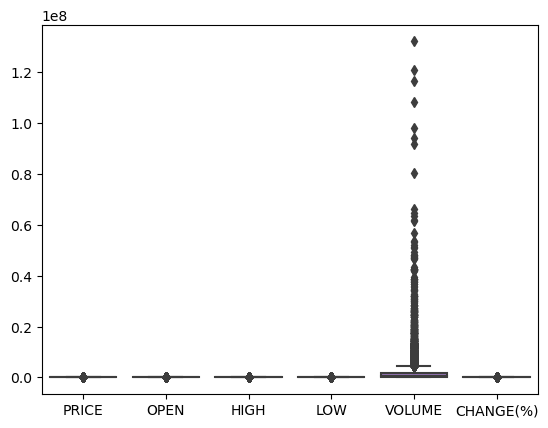

In [10]:
sns.boxplot(data=df1)

df1['DATE'] = pd.to_datetime(df1['DATE'])

# Correcting the incomplete line in the dataset
df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(d):
    Q1, Q3 = np.quantile(d, q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    d1 = np.where(d < lower, lower, d)
    d1 = np.where(d1 > upper, upper, d1)
    return d1

# Group by 'Company' and apply the remove_outliers function to numerical columns
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df_outliers_removed = df1.groupby('Company')[numerical_columns].apply(lambda x: x.apply(remove_outliers))

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_outliers_removed)
plt.title('Boxplots of Numerical Columns After Removing Outliers by Company')
plt.show()

df1['DATE'] = pd.to_datetime(df1['DATE'])

df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(d):
    Q1, Q3 = np.quantile(d, q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    d1 = np.where(d < lower, lower, d)
    d1 = np.where(d1 > upper, upper, d1)
    return d1

# Apply the remove_outliers function to numerical columns of the DataFrame
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df1[numerical_columns] = df1[numerical_columns].apply(remove_outliers)

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[numerical_columns])
plt.show()


df1['DATE'] = pd.to_datetime(df1['DATE'])
df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(column):
    Q1, Q3 = column.quantile(q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column.apply(lambda x: max(min(x, upper), lower))

# Apply the remove_outliers function to numerical columns of the DataFrame
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df1[numerical_columns] = df1[numerical_columns].apply(remove_outliers)

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[numerical_columns])
plt.show()


In [11]:
df1.isna().sum()

Category     0
Company      0
Industry     0
DATE         0
PRICE        0
OPEN         0
HIGH         0
LOW          0
VOLUME       0
CHANGE(%)    0
dtype: int64

In [12]:
df1.dropna(inplace=True)

In [13]:
df2=df1.copy()

df2 = df2.sort_values(by='DATE')

# Calculate daily returns for each stock
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return
14059,Hospitality,Lemon Tree,"Hotel, Resort & Rstaurants",2019-01-01,74.30,73.45,75.55,72.40,1252687,0.0095,NaN
9310,Hospitality,EIH,"Hotel, Resort & Rstaurants",2019-01-01,191.85,192.83,195.13,189.84,90567,-0.0118,NaN
3142,Dimond & Jewellers,Rajesh Exports,Dimond & Jewellers,2019-01-01,572.15,572.95,573.00,570.50,180116,0.0020,NaN
12826,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-01,29.75,29.53,30.06,29.53,20108,-0.0063,NaN
5610,Dimond & Jewellers,Thangmayil,Dimond & Jewellers,2019-01-01,190.08,190.35,191.00,185.65,4471,0.0015,NaN
...,...,...,...,...,...,...,...,...,...,...,...
0,Dimond & Jewellers,Titan Company,Dimond & Jewellers,2023-12-20,3554.10,3610.45,3651.50,3541.00,849001,-0.0156,-0.015607
3143,Dimond & Jewellers,Vaibhav Global,Dimond & Jewellers,2023-12-21,407.45,390.00,409.50,390.00,213871,0.0267,0.026710
10388,Hospitality,Chalet Hotel,"Hotel, Resort & Rstaurants",2023-12-21,649.60,636.00,664.35,628.55,379721,-0.0052,-0.005207
5611,Dimond & Jewellers,PC Jewellers,Dimond & Jewellers,2023-12-21,47.60,43.45,48.50,42.15,21983201,0.0818,0.081818


In [14]:

df2 = df2.sort_values(by=['Company', 'DATE'])

# Calculate additional features
df2['MA_10'] = df2.groupby('Company')['PRICE'].transform(lambda x: x.rolling(window=10).mean())
df2['MA_50'] = df2.groupby('Company')['PRICE'].transform(lambda x: x.rolling(window=30).mean())
df2.head(20)


,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50
12826,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-01,29.75,29.53,30.06,29.53,20108,-0.0063,NaN,NaN,NaN
12803,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-02,25.48,25.89,26.13,25.14,18912,-0.0238,-0.143529,NaN,NaN
12783,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-03,25.89,25.15,26.83,24.83,86752,0.0482,0.016091,NaN,NaN
12764,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-04,31.01,29.05,31.55,29.01,373944,0.0790,0.197760,NaN,NaN
12704,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-07,24.85,25.66,25.99,24.75,42119,-0.0335,-0.198646,NaN,NaN
12681,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-08,20.05,20.30,20.30,19.50,12609,-0.0220,-0.193159,NaN,NaN
12642,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-10,20.00,20.08,20.68,19.78,36712,0.0000,-0.002494,NaN,NaN
12622,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-11,18.43,19.24,19.24,18.13,13816,-0.0171,-0.078500,NaN,NaN
12817,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-14,29.68,30.23,30.26,29.56,36365,0.0013,0.610418,NaN,NaN
12816,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-15,30.24,29.78,30.38,29.50,41466,0.0189,0.018868,25.538,NaN


In [15]:
df2.tail(10)

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50
9378,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-09,968.75,969.20,977.00,949.60,291573,-0.0005,0.095190,841.610,846.058333
9358,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-10,934.55,933.45,939.00,916.10,110566,0.0065,-0.035303,848.095,847.781667
9337,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-11,830.40,830.00,833.70,821.15,14859,0.0147,-0.111444,842.485,848.120000
9317,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-12,843.85,852.00,855.00,838.75,336348,-0.0060,0.016197,838.615,849.280000
9316,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-13,852.40,847.00,864.80,843.05,397071,0.0101,0.010132,833.875,851.240000
9315,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-14,835.20,854.75,856.70,832.25,234486,-0.0202,-0.020178,843.015,854.006667
9314,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-15,851.15,839.55,855.00,835.20,342110,0.0191,0.019097,857.980,858.953333
9313,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-18,832.05,851.00,851.00,828.00,92982,-0.0224,-0.022440,864.825,861.330000
9312,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-19,826.65,835.80,841.55,819.00,269438,-0.0065,-0.006490,865.955,859.628333
9311,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-20,804.35,828.00,834.40,800.05,277005,-0.0270,-0.026976,857.935,855.416667


In [16]:
# Calculate volatility (using a rolling standard deviation for the last 10 days)
df2['Volatility'] = df2.groupby('Company')['Daily_Return'].transform(lambda x: x.rolling(window=10).std())
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50,Volatility
12826,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-01,29.75,29.53,30.06,29.53,20108,-0.0063,NaN,NaN,NaN,NaN
12803,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-02,25.48,25.89,26.13,25.14,18912,-0.0238,-0.143529,NaN,NaN,NaN
12783,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-03,25.89,25.15,26.83,24.83,86752,0.0482,0.016091,NaN,NaN,NaN
12764,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-04,31.01,29.05,31.55,29.01,373944,0.0790,0.197760,NaN,NaN,NaN
12704,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-07,24.85,25.66,25.99,24.75,42119,-0.0335,-0.198646,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9315,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-14,835.20,854.75,856.70,832.25,234486,-0.0202,-0.020178,843.015,854.006667,0.070267
9314,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-15,851.15,839.55,855.00,835.20,342110,0.0191,0.019097,857.980,858.953333,0.065727
9313,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-18,832.05,851.00,851.00,828.00,92982,-0.0224,-0.022440,864.825,861.330000,0.062436
9312,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-19,826.65,835.80,841.55,819.00,269438,-0.0065,-0.006490,865.955,859.628333,0.059184


In [17]:
summary_stats = df2.groupby(['Company']).describe()
summary_stats
# Display the summary statistics

PRICE                                             \
                    count         mean         std     min       25%   
Company                                                                
BLS International  1233.0    80.210308   80.316581    6.88    21.550   
Chalet Hotel       1206.0   292.831841  119.013693  100.40   179.850   
EIH                1233.0   145.033990   47.501950   53.95   106.150   
Indian Hotel       1233.0   202.637307  105.375995   60.41   127.950   
Kalyan Jewellers    677.0   112.099557   71.111027   55.85    66.700   
Lemon Tree         1233.0    60.995539   25.155566   14.40    41.450   
PC Jewellers       1234.0    36.325162   24.995653    8.05    23.050   
Rajesh Exports     1233.0   599.875345  108.562786  343.15   513.450   
Thangmayil         1234.0   446.761515  324.346093  112.80   175.000   
Titan Company      1233.0  1885.420397  750.081594  800.95  1172.000   
Vaibhav Global     1234.0   375.185146  201.972588  119.56   199.765   
Westlife Food      1077.0   545.622470  187.792771  273.15   391.100   

                                                   OPEN               ...  \
                        50%        75%      max   count         mean  ...   
Company                                                               ...   
BLS International    32.840   140.6500   317.10  1233.0    80.293455  ...   
Chalet Hotel        307.800   348.4625   677.25  1206.0   293.301907  ...   
EIH                 144.770   178.0500   272.25  1233.0   145.365888  ...   
Indian Hotel        147.630   305.1500   448.90  1233.0   202.891241  ...   
Kalyan Jewellers     80.850   117.9500   347.90   677.0   112.259010  ...   
Lemon Tree           59.100    77.3000   122.80  1233.0    61.212936  ...   
PC Jewellers         26.950    35.1875   145.95  1234.0    36.443355  ...   
Rajesh Exports      592.700   676.7000   950.95  1233.0   601.548256  ...   
Thangmayil          413.040   565.5925  1489.70  1234.0   448.393817  ...   
Titan Company      1722.850  2521.0000  3634.65  1233.0  1886.661719  ...   
Vaibhav Global      336.775   441.5750   996.70  1234.0   376.850413  ...   
Westlife Food       492.550   691.6500   988.95  1077.0   546.865088  ...   

                         MA_50              Volatility                      \
                           75%          max      count      mean       std   
Company                                                                      
BLS International   123.213333   264.545000     1223.0  0.185907  0.122874   
Chalet Hotel        335.948333   575.893333     1196.0  0.133135  0.129867   
EIH                 175.309000   230.766667     1223.0  0.113182  0.087133   
Indian Hotel        284.805417   413.071667     1223.0  0.105652  0.075998   
Kalyan Jewellers    138.907500   281.253333      667.0  0.143838  0.091141   
Lemon Tree           75.130000   111.966667     1223.0  0.140071  0.134216   
PC Jewellers         44.100000    97.850000     1224.0  0.253265  0.233272   
Rajesh Exports      667.432500   786.260000     1223.0  0.104903  0.080593   
Thangmayil          578.404667  1300.897000     1224.0  0.126313  0.081104   
Titan Company      2531.479167  3311.855000     1223.0  0.078511  0.044348   
Vaibhav Global      420.691667   809.712333     1224.0  0.119916  0.074212   
Westlife Food       676.742500   905.750000     1067.0  0.088626  0.048568   

                                                                     
                        min       25%       50%       75%       max  
Company                                                              
BLS International  0.006672  0.086554  0.171362  0.256115  0.636384  
Chalet Hotel       0.003771  0.052342  0.095820  0.157528  0.745594  
EIH                0.004867  0.048311  0.095256  0.148897  0.468857  
Indian Hotel       0.006770  0.044505  0.087138  0.157182  0.386445  
Kalyan Jewellers   0.007744  0.071555  0.136898  0.197075  0.373394  
Lemon Tree         0.006737  0.062437  0.107719  0.1

Text(0.5, 1.0, 'Distribution of Daily Returns')

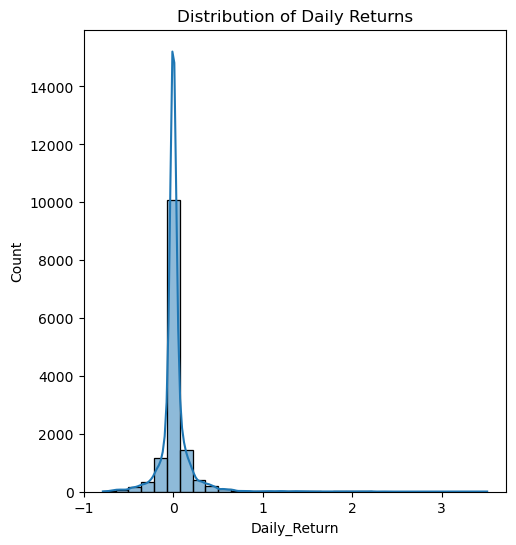

In [18]:
df2 = df2.sort_values(by=['Company', 'DATE'])

# Plot histograms for returns and trading volumes
plt.figure(figsize=(12, 6))

# Histogram for Daily Returns
plt.subplot(1, 2, 1)
sns.histplot(df2['Daily_Return'], bins=30, kde=True)
plt.title('Distribution of Daily Returns')

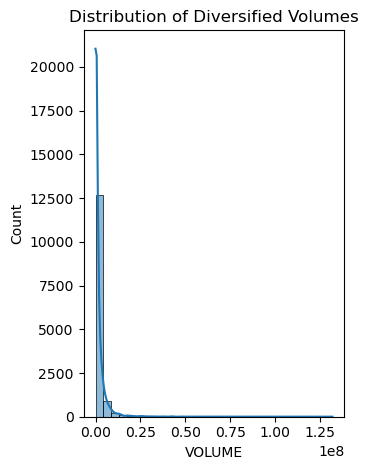

In [19]:
# Histogram for Trading Volumes
plt.subplot(1, 2, 2)
sns.histplot(df2['VOLUME'], bins=30, kde=True)
plt.title('Distribution of Diversified Volumes')

plt.tight_layout()
plt.show()

In [20]:
correlation_matrix = df2.groupby('Company')[['Daily_Return', 'VOLUME']].corr()
correlation_matrix

Daily_Return    VOLUME
Company                                               
BLS International Daily_Return      1.000000  0.078698
                  VOLUME            0.078698  1.000000
Chalet Hotel      Daily_Return      1.000000  0.073531
                  VOLUME            0.073531  1.000000
EIH               Daily_Return      1.000000  0.155965
                  VOLUME            0.155965  1.000000
Indian Hotel      Daily_Return      1.000000  0.122033
                  VOLUME            0.122033  1.000000
Kalyan Jewellers  Daily_Return      1.000000  0.208050
                  VOLUME            0.208050  1.000000
Lemon Tree        Daily_Return      1.000000  0.097676
                  VOLUME            0.097676  1.000000
PC Jewellers      Daily_Return      1.000000  0.135383
                  VOLUME            0.135383  1.000000
Rajesh Exports    Daily_Return      1.000000 -0.015398
                  VOLUME           -0.015398  1.000000
Thangmayil        Daily_Return      1.000000  0.119790
                  VOLUME            0.119790  1.000000
Titan Company     Daily_Return      1.000000 -0.027173
                  VOLUME           -0.027173  1.000000
Vaibhav Global    Daily_Return      1.000000  0.066134
                  VOLUME            0.066134  1.000000
Westlife Food     Daily_Return      1.000000  0.088523
                  VOLUME            0.088523  1.000000

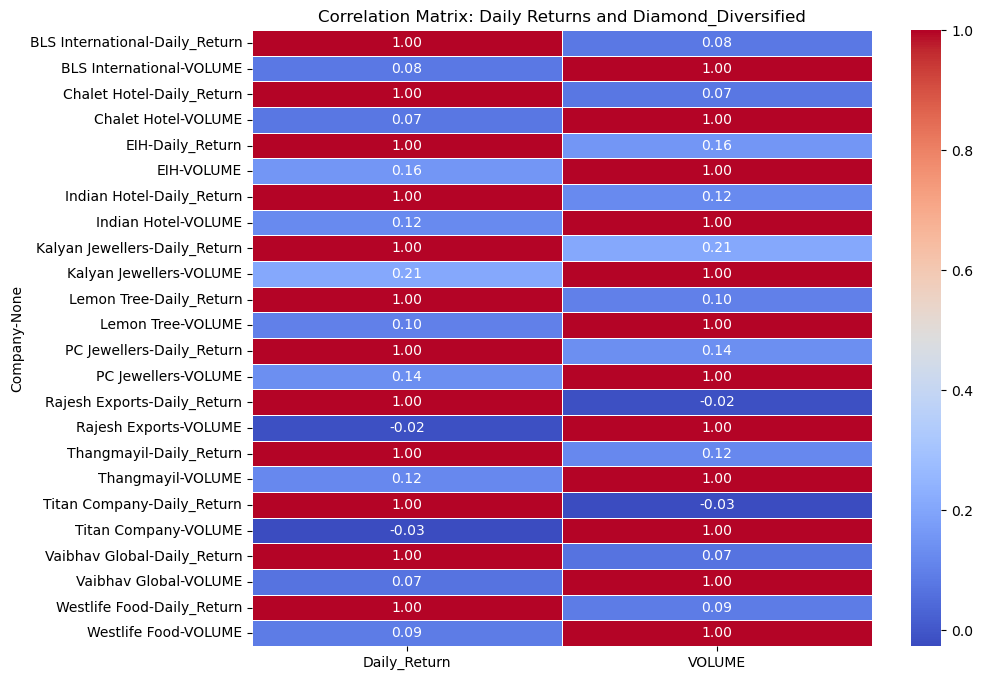

In [21]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Daily Returns and Diamond_Diversified')
plt.show()

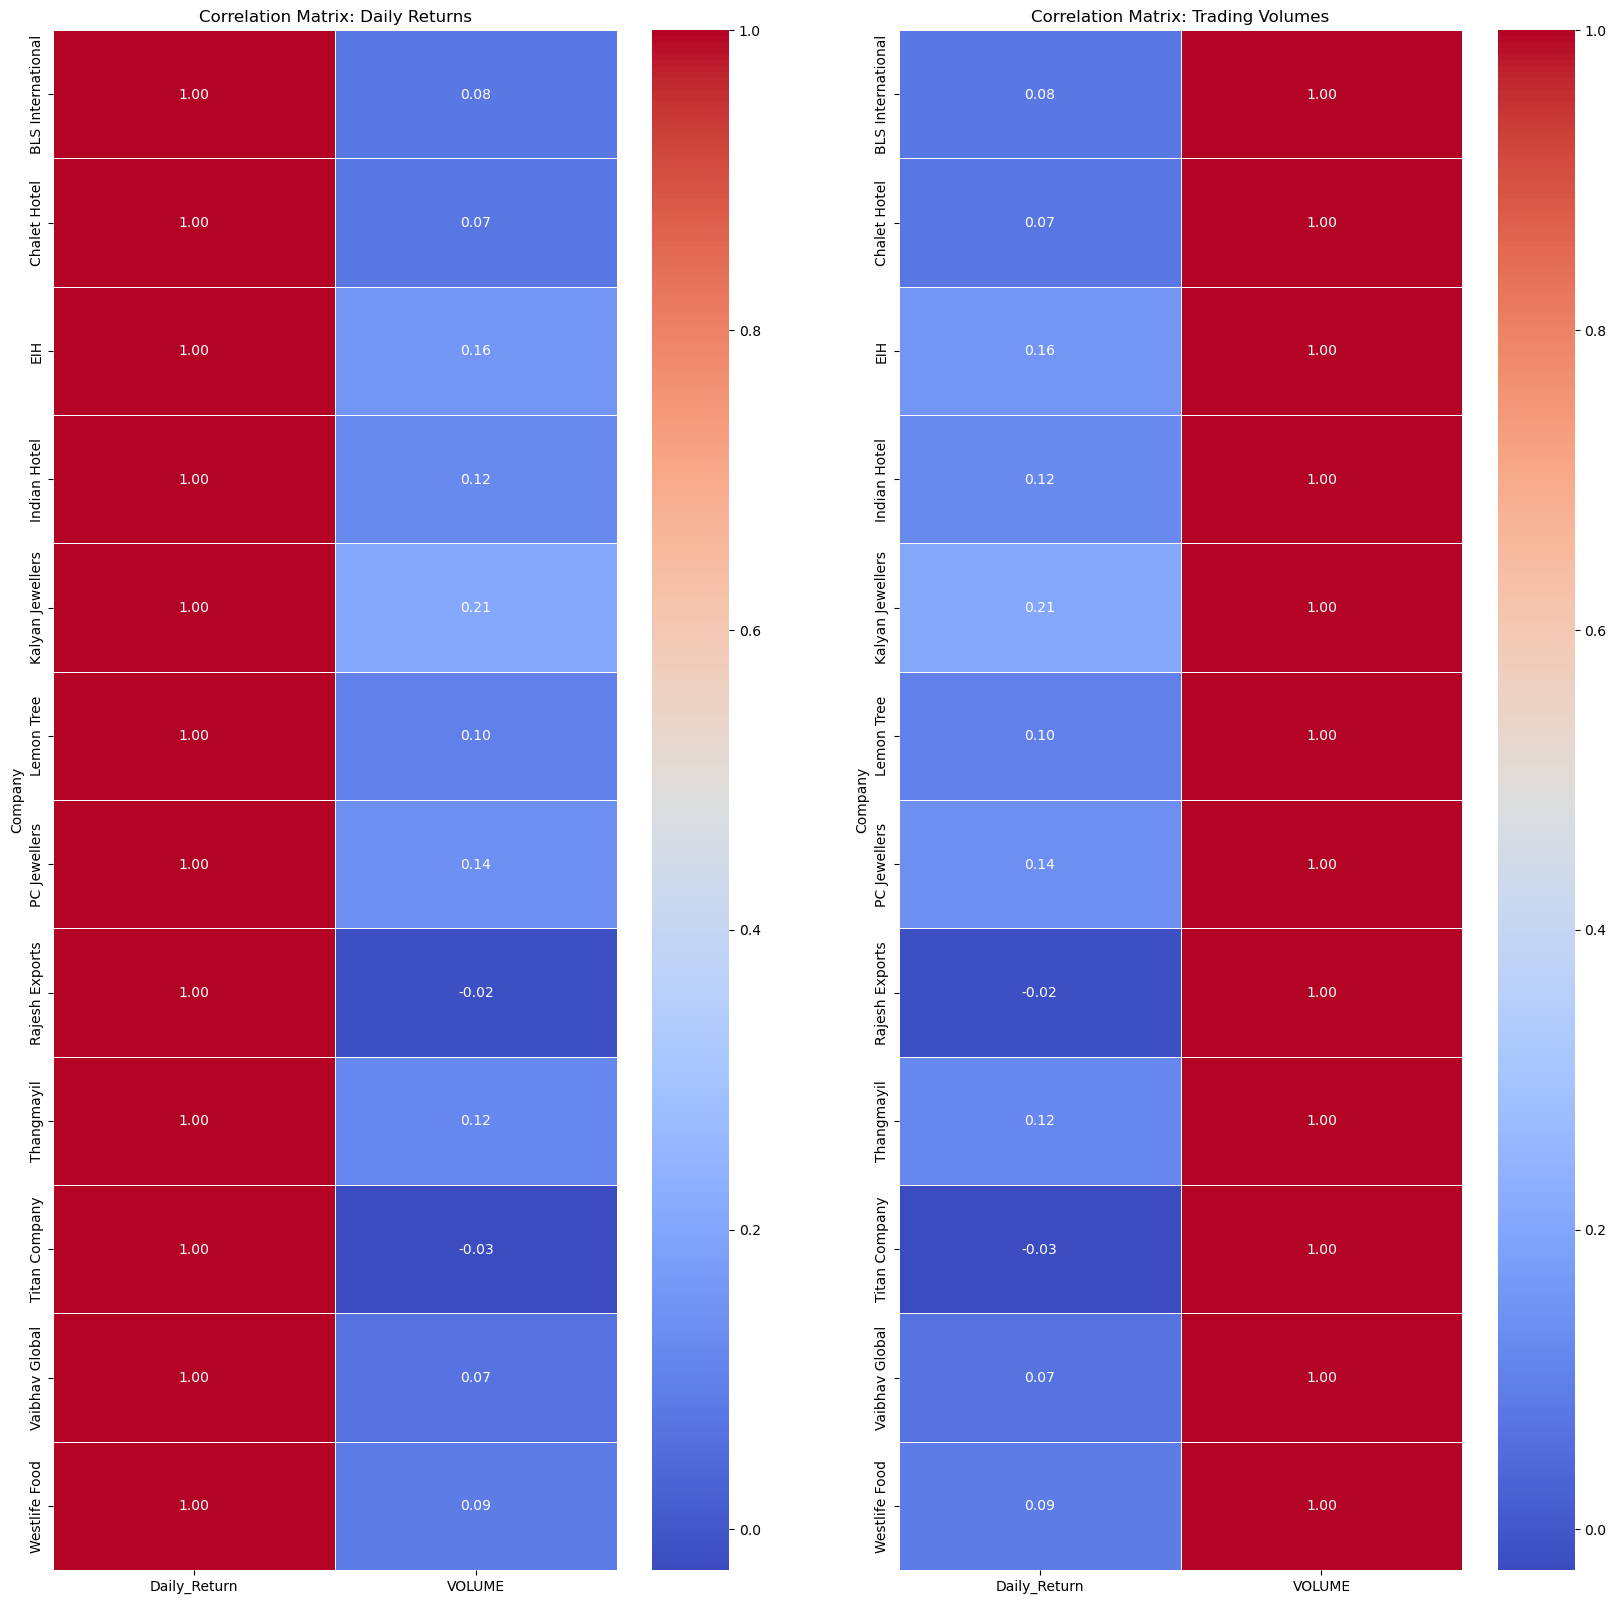

In [22]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Sort the DataFrame by 'DATE' in ascending order
df2 = df2.sort_values(by=['Company', 'DATE'])

# Calculate the correlation matrix
correlation_matrix = df2.groupby(['Company'])[['Daily_Return', 'VOLUME']].corr().unstack()

# Visualize the correlation matrices
plt.figure(figsize=(20, 20))

# Correlation matrix for Daily Returns
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix['Daily_Return'], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Daily Returns')

# Correlation matrix for Trading Volumes
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix['VOLUME'], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Trading Volumes')

#plt.tight_layout()
plt.show()


In [23]:
grouped_df = df2.groupby('Company')
grouped_df['Daily_Return'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
BLS International,1232.0,0.024575,0.216980,-0.722548,-0.029791,0.000648,0.050790,1.356653
Chalet Hotel,1205.0,0.013269,0.179719,-0.576567,-0.022489,0.000924,0.029213,2.210159
EIH,1232.0,0.008650,0.137707,-0.518906,-0.025656,-0.002143,0.023535,1.230547
Indian Hotel,1232.0,0.008735,0.125507,-0.513238,-0.021876,0.000000,0.029509,0.871855
Kalyan Jewellers,676.0,0.017386,0.165501,-0.689824,-0.021969,0.000600,0.037628,0.772065
Lemon Tree,1232.0,0.015267,0.187934,-0.693562,-0.023588,0.001127,0.032534,2.319444
PC Jewellers,1233.0,0.037341,0.334804,-0.788002,-0.046809,-0.005481,0.042831,3.509839
Rajesh Exports,1232.0,0.006392,0.127284,-0.388056,-0.021938,-0.001050,0.015663,1.308270
Thangmayil,1233.0,0.013479,0.145919,-0.625505,-0.020493,0.003275,0.036687,0.735476


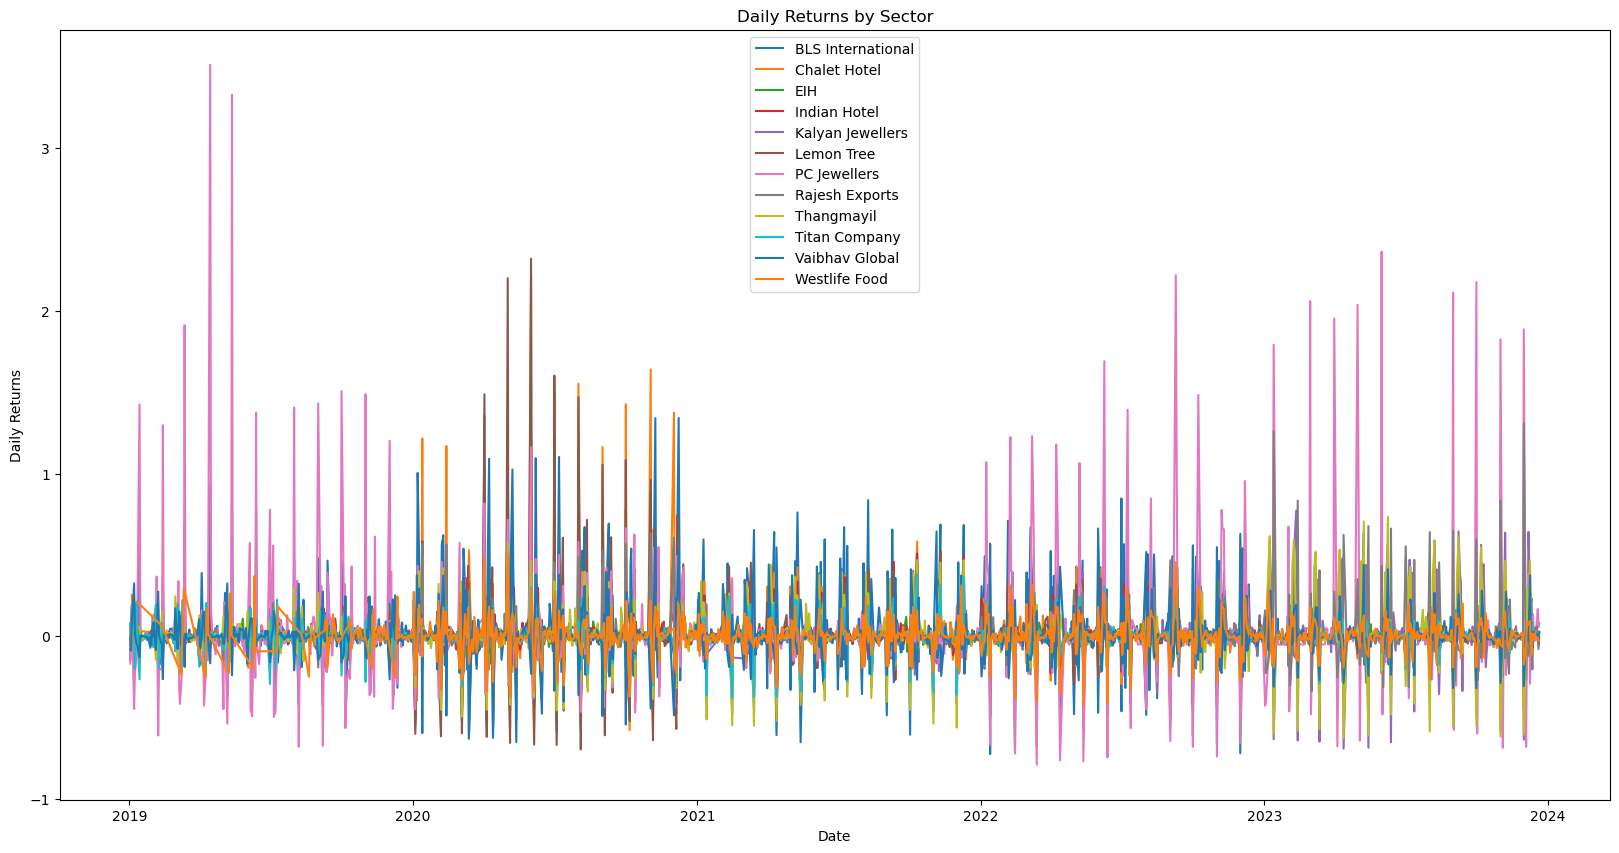

In [24]:
# Example: Line chart
plt.figure(figsize=(20, 10))
for name, group in grouped_df:
    plt.plot(group['DATE'], group['Daily_Return'], label=name)

plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()


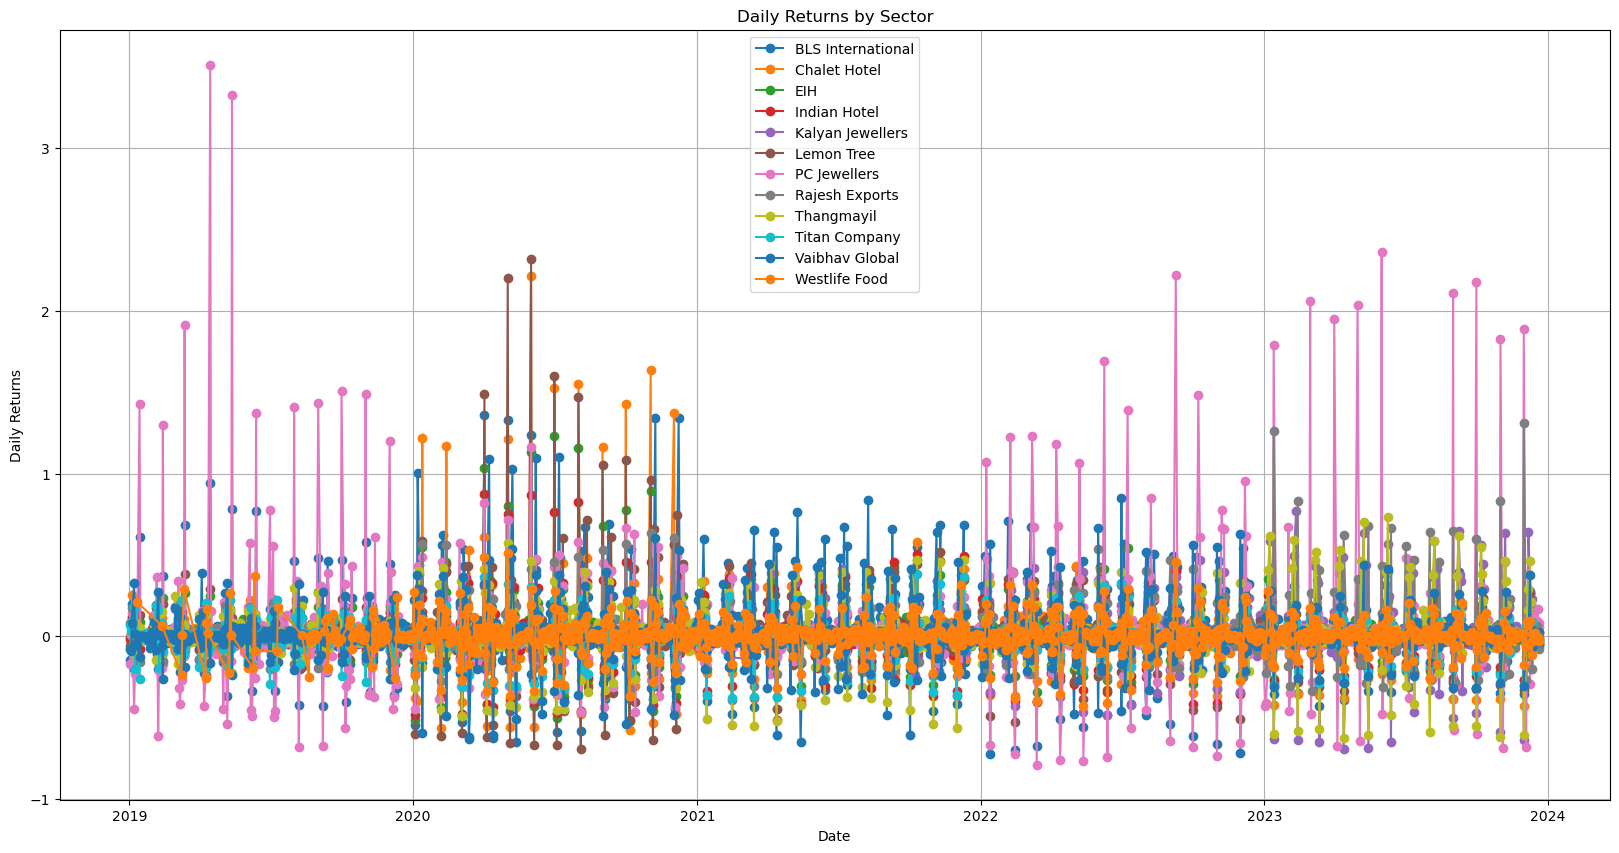

In [25]:


plt.figure(figsize=(20, 10))

for name, group in grouped_df:
    plt.plot(group['DATE'], group['Daily_Return'], label=name, marker='o', linestyle='-')

plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()


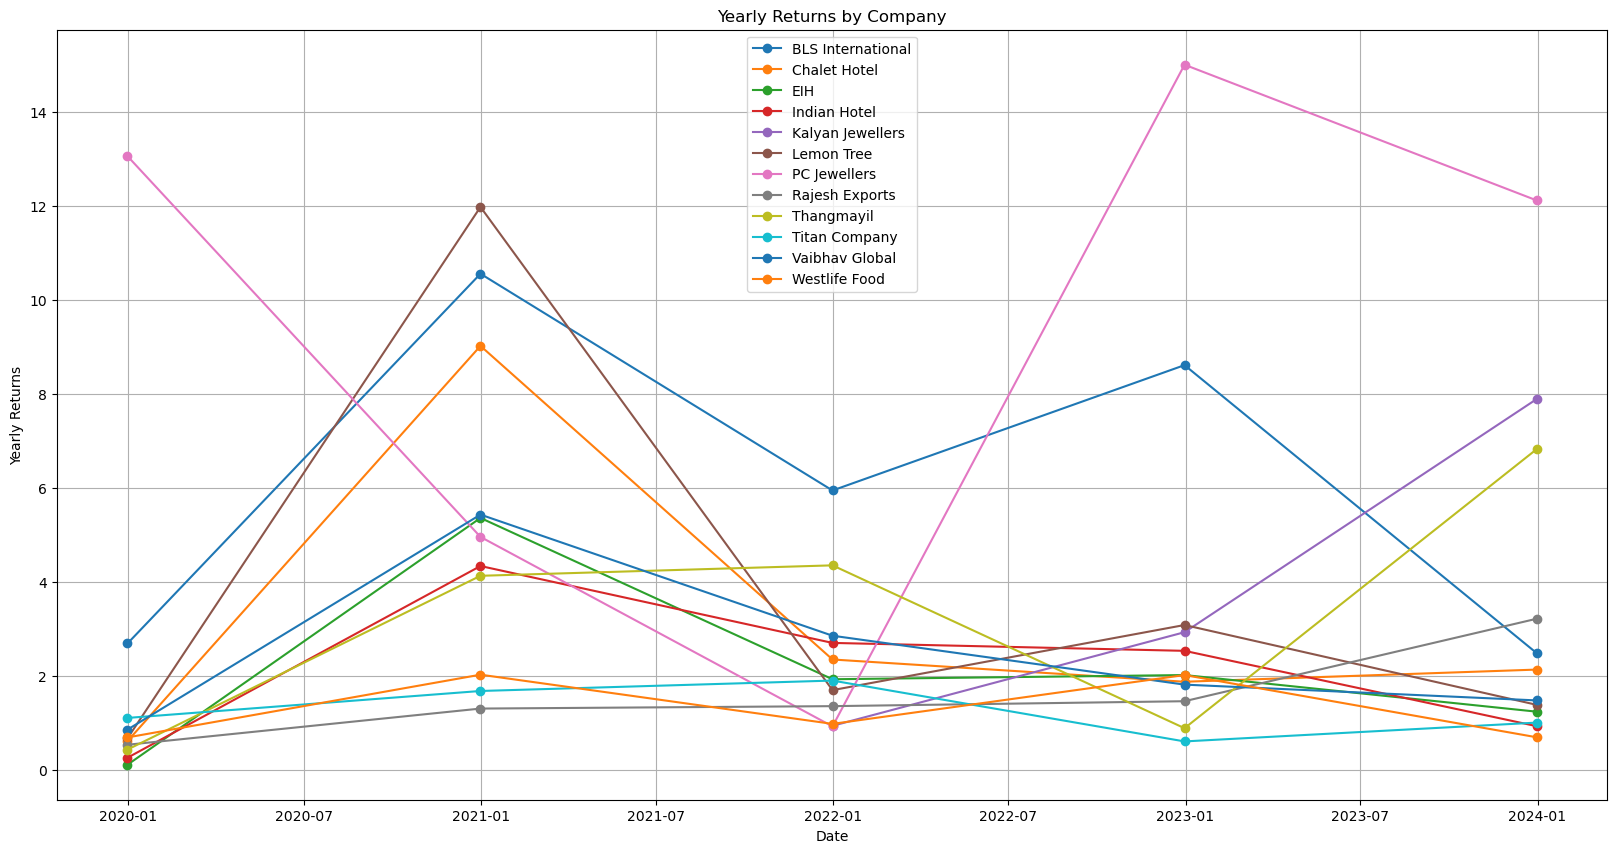

In [26]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate yearly returns
df2_yearly = df2.set_index('DATE').groupby(['Company', pd.Grouper(freq='Y')])['Daily_Return'].sum().reset_index()

# Plotting
plt.figure(figsize=(20, 10))

for name, group in df2_yearly.groupby('Company'):
    plt.plot(group['DATE'], group['Daily_Return'], label=name, marker='o', linestyle='-')

plt.title('Yearly Returns by Company')
plt.xlabel('Date')
plt.ylabel('Yearly Returns')
plt.legend()
plt.grid(True)
plt.show()


D:\Anaconda\New folder\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\Anaconda\New folder\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


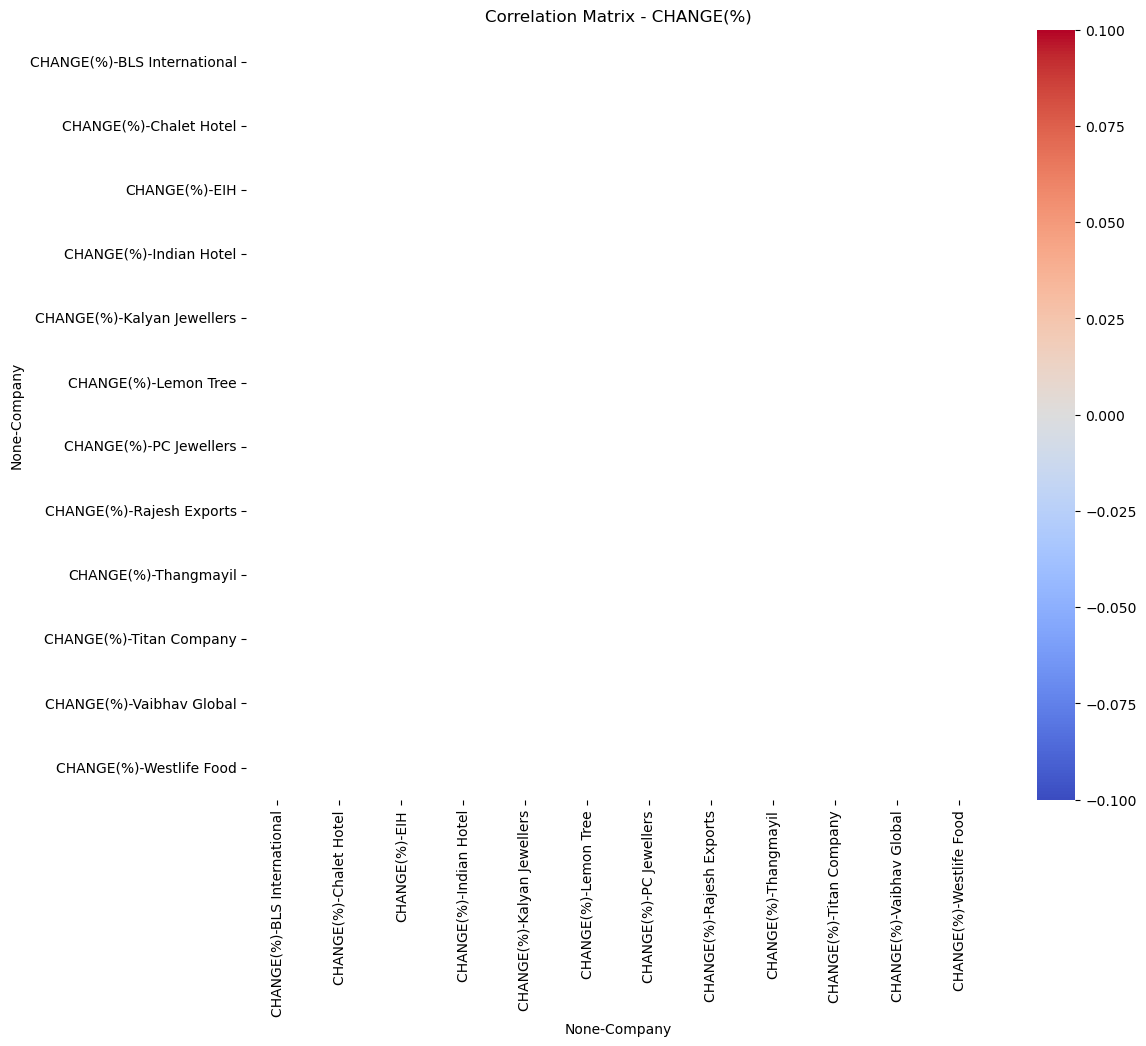

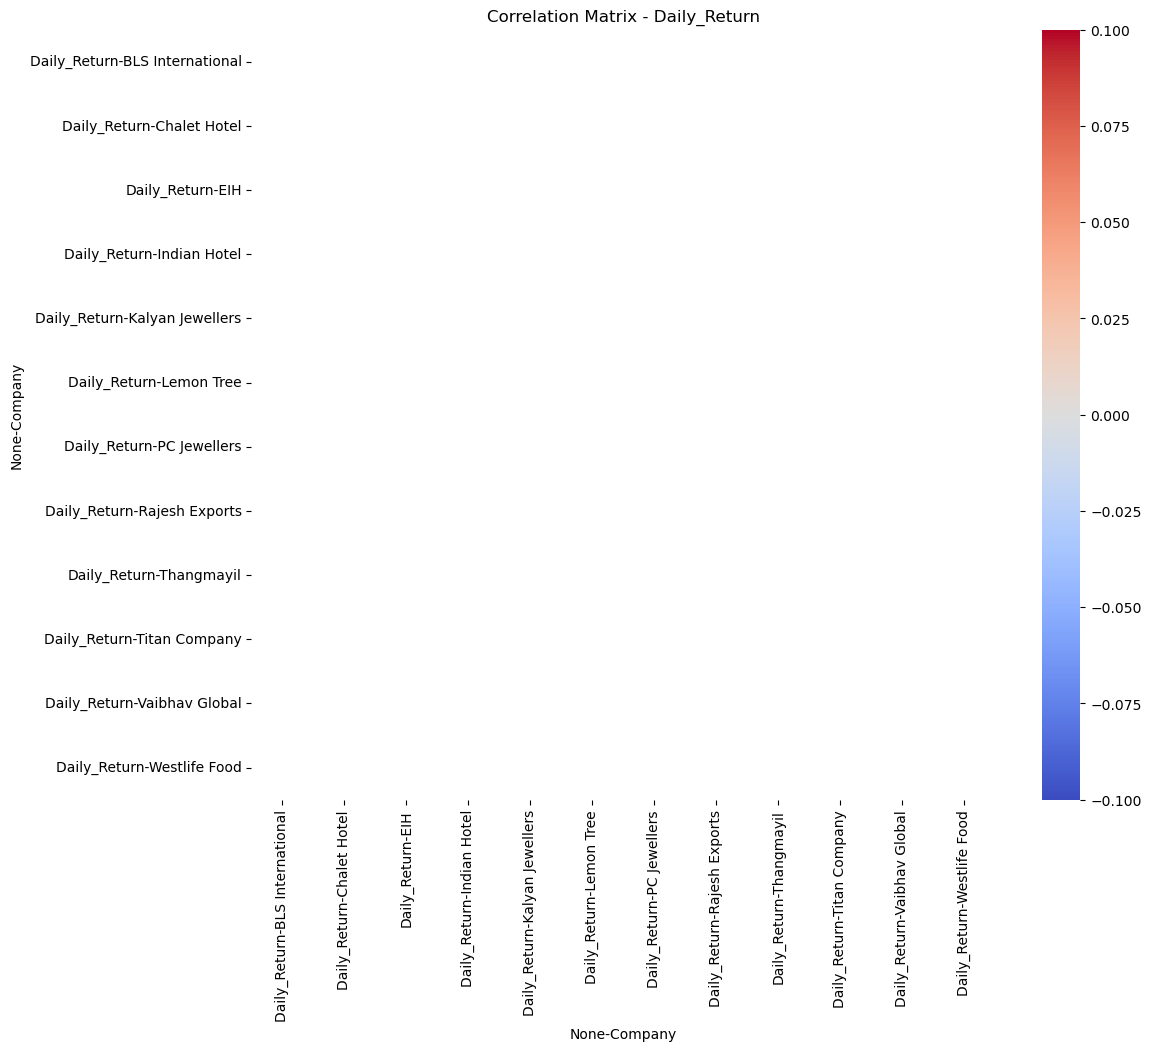

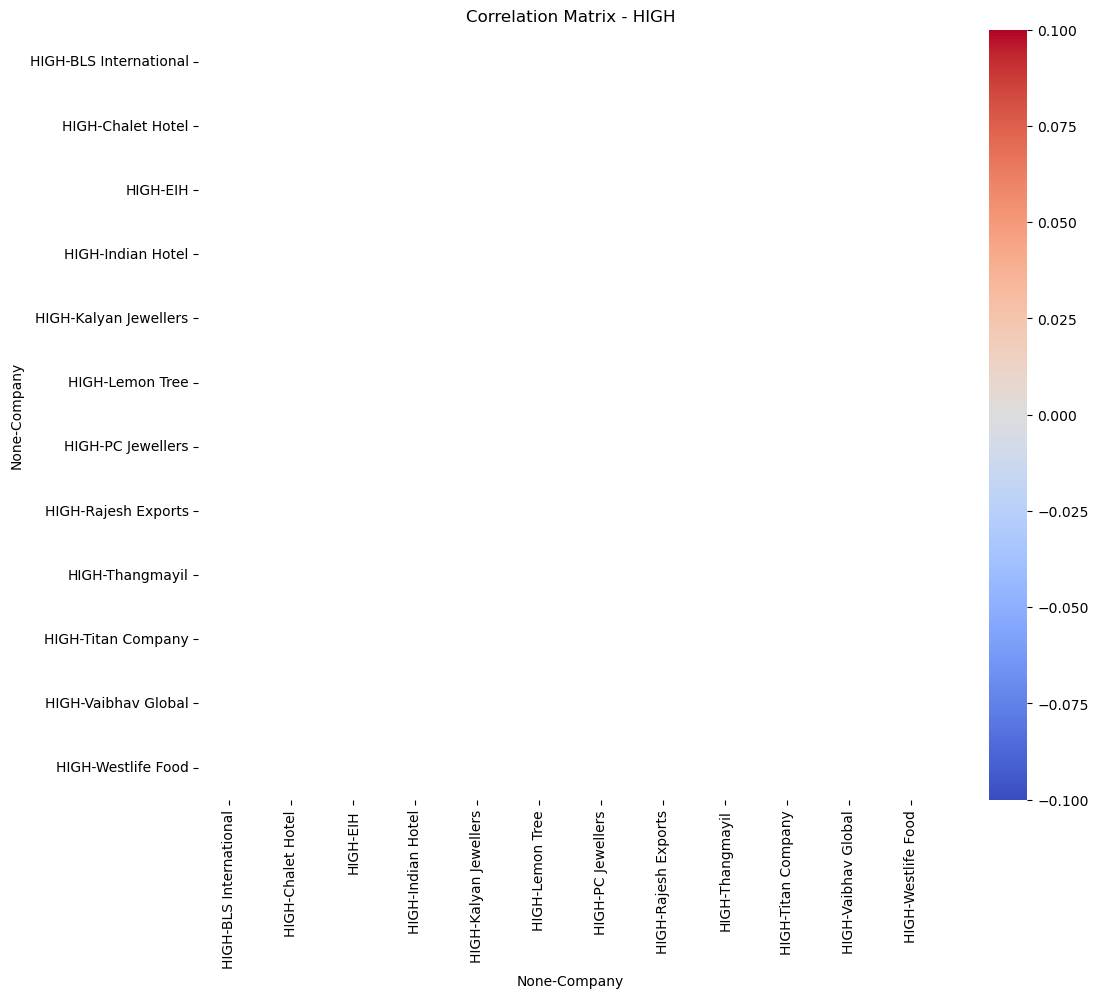

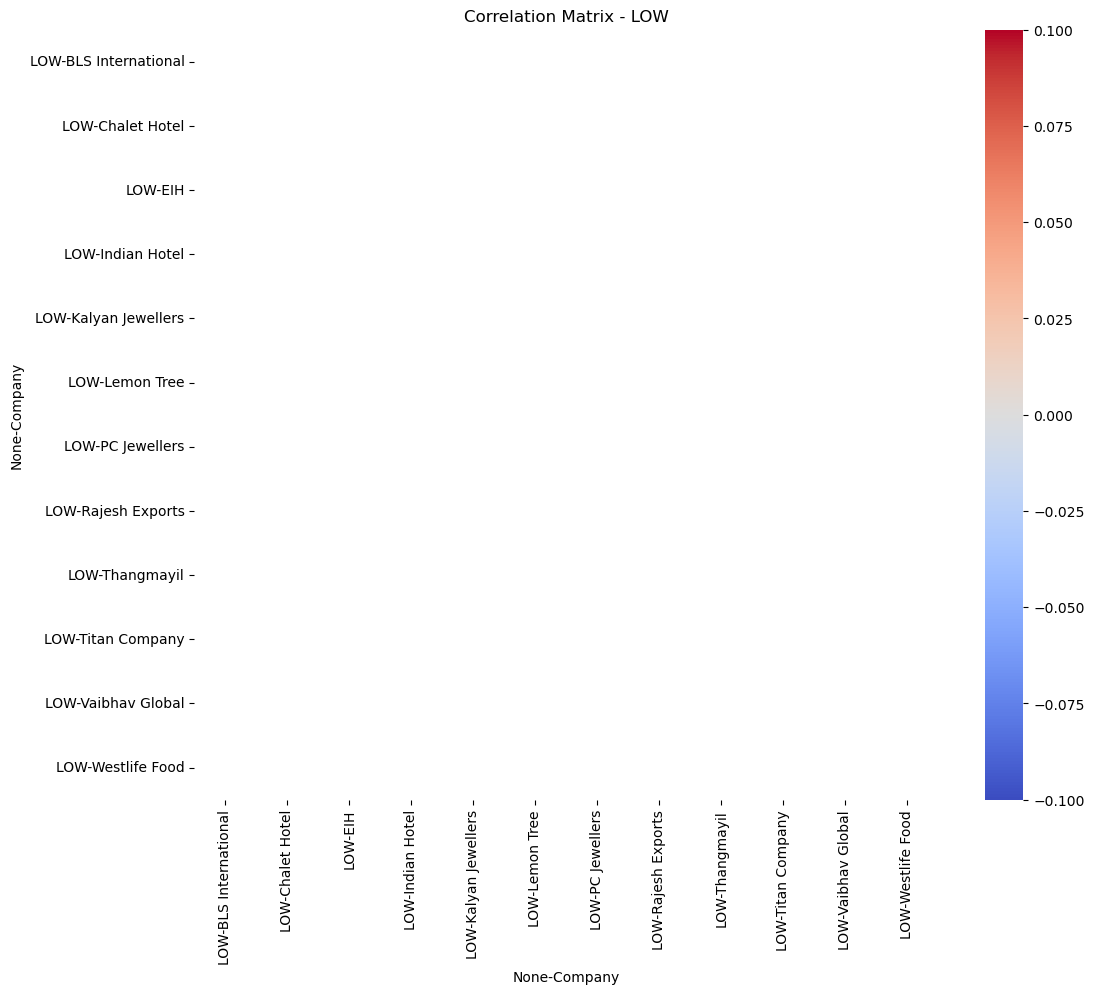

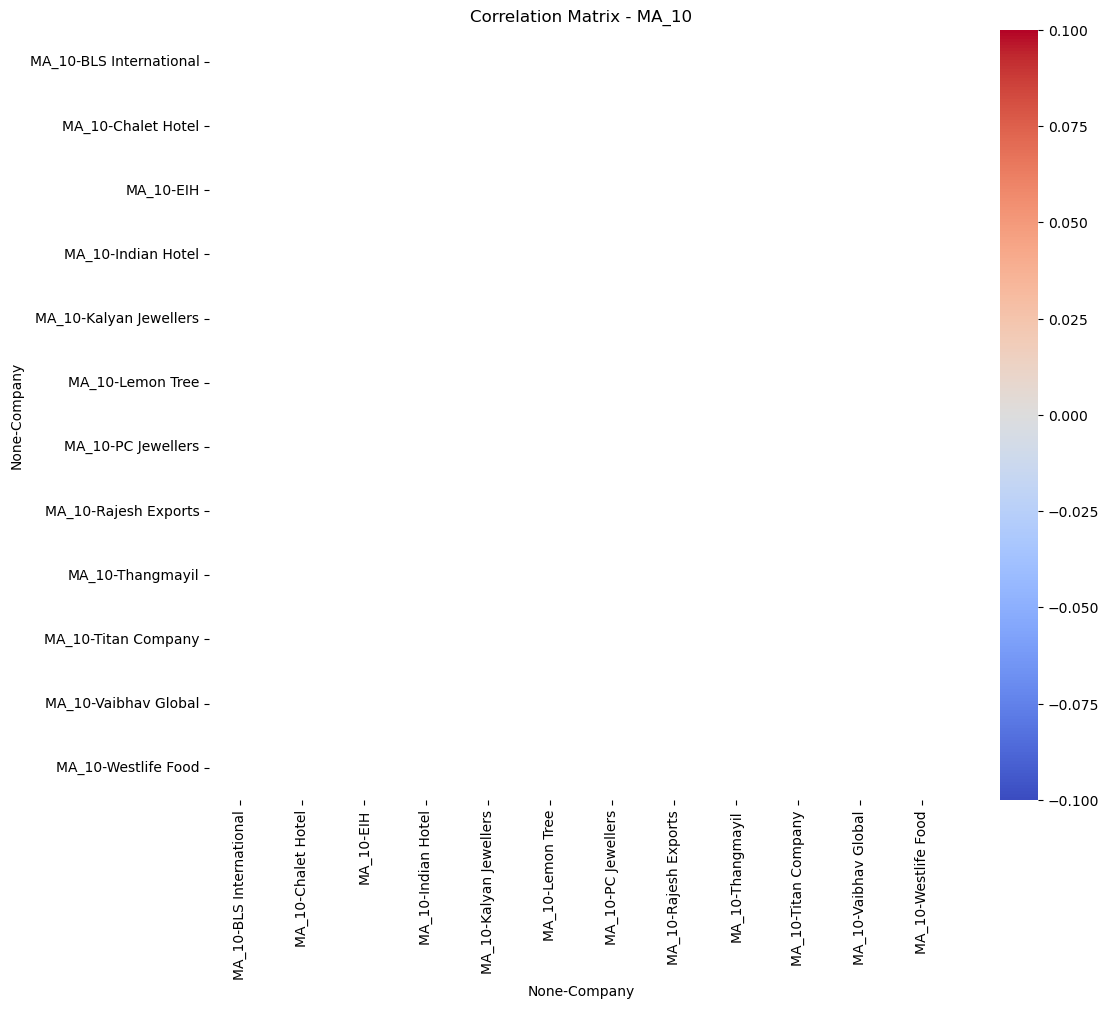

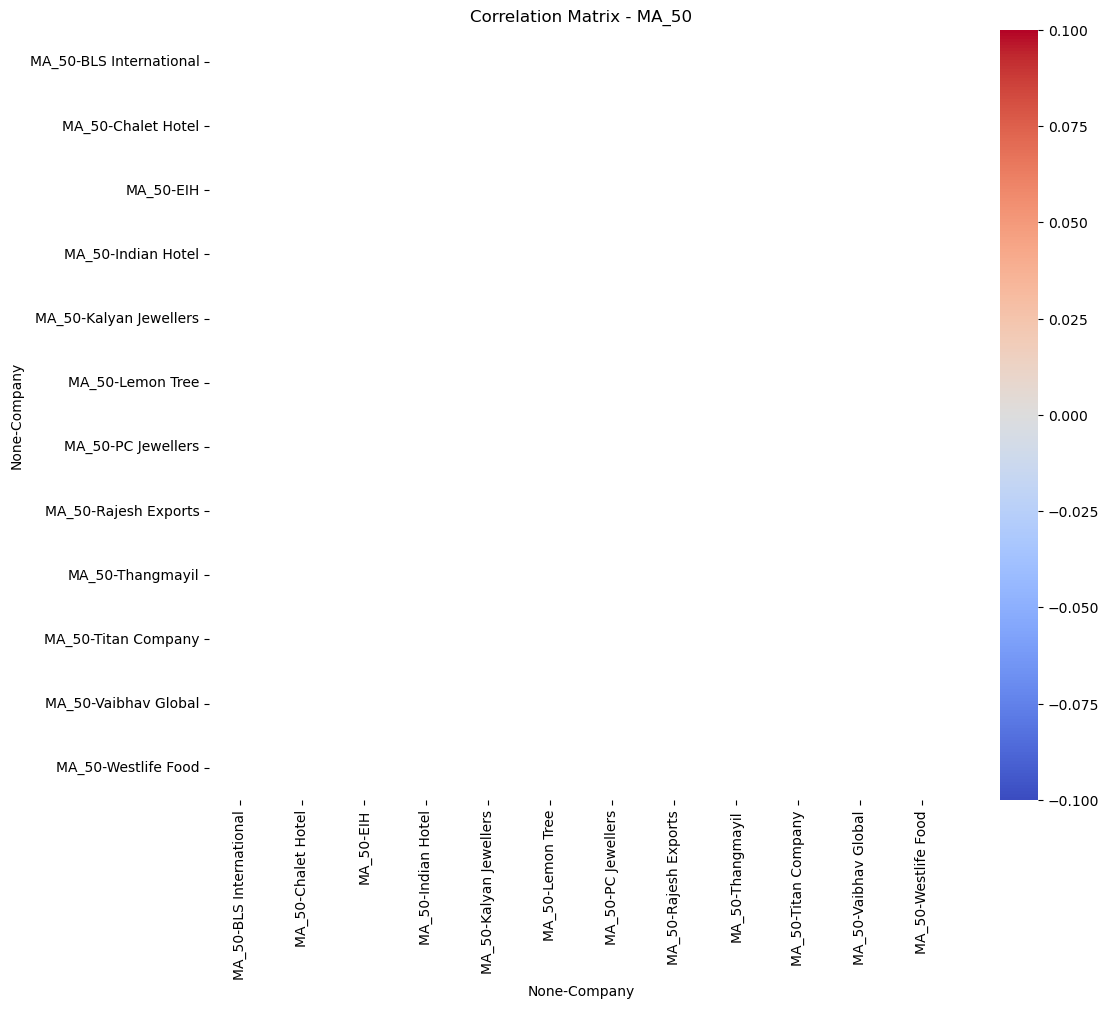

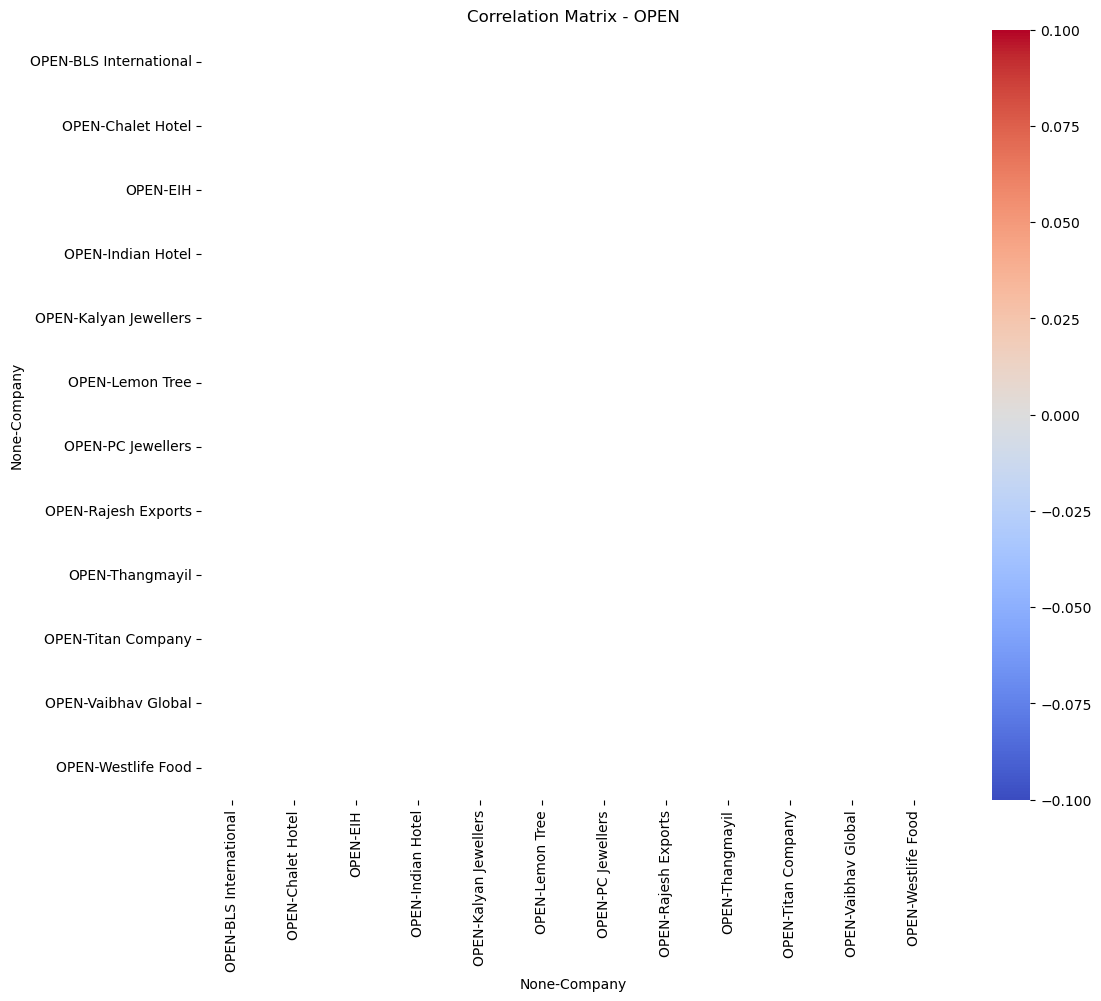

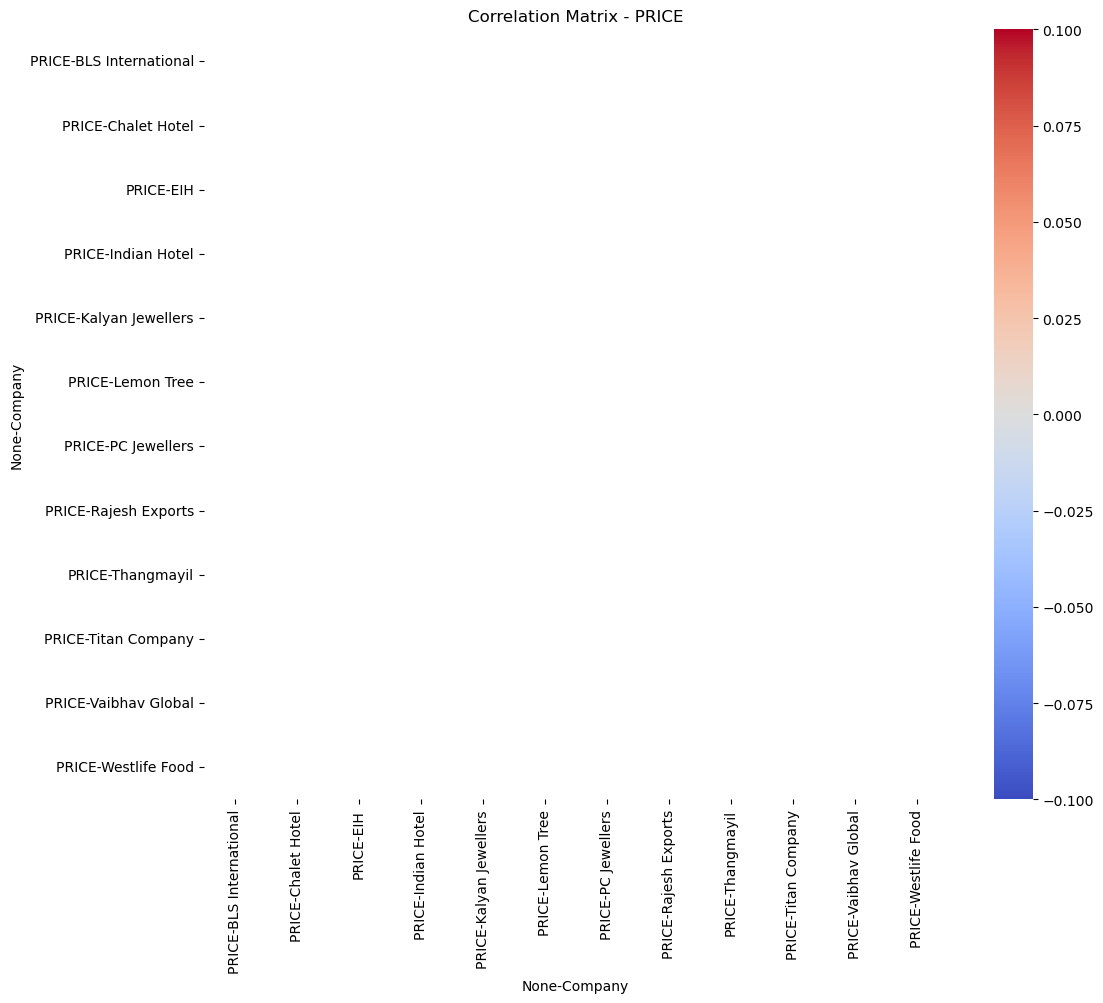

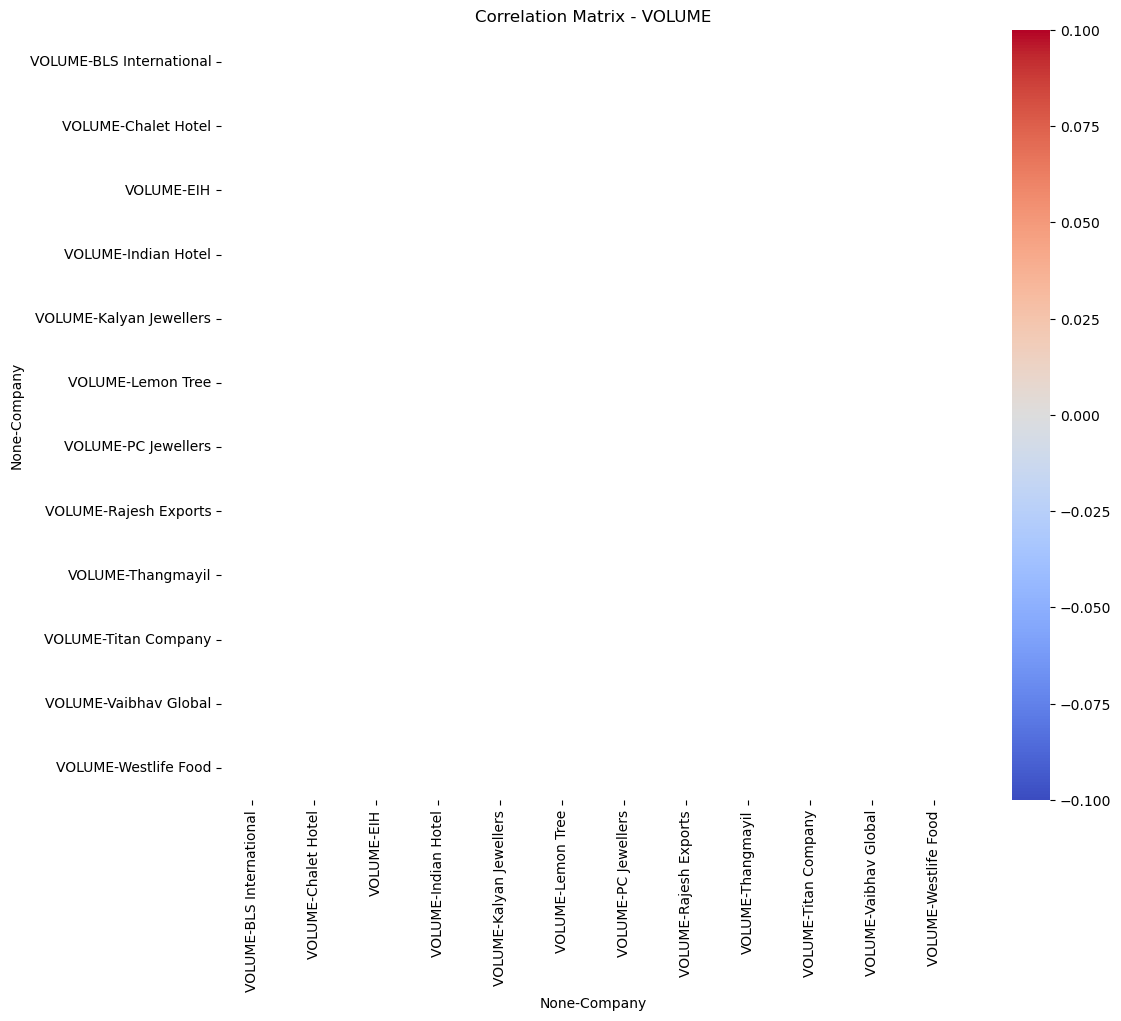

In [27]:

columns_of_interest = ['PRICE', 'OPEN', 'HIGH', 'LOW', 'VOLUME', 'CHANGE(%)', 'Daily_Return', 'MA_10', 'MA_50', 'Category','Company']

# Select relevant columns from the DataFrame
df_subset = df2[columns_of_interest]

# Create a pivot table to separate the data by 'Category'
pivot_table = df_subset.pivot_table(index='Category', columns='Company', values=columns_of_interest[:-1], aggfunc='mean')

# Calculate correlation matrix for each 'Category'
correlation_matrices = {}
for category, data in pivot_table.groupby(level=0, axis=1):
    correlation_matrices[category] = data.corr()

# Plot correlation matrices
for category, matrix in correlation_matrices.items():
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Matrix - {category}')
    plt.show()


In [28]:
# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Laggards within Each Category (Bottom 1)
laggards = df2.groupby('Category').apply(lambda x: x.nsmallest(1, 'Cumulative_Return'))

# Display the results
print("Laggards within Each Category:")
print(laggards[['Category', 'Company', 'Cumulative_Return']])

Laggards within Each Category:
                                   Category       Company  Cumulative_Return
Category                                                                    
Dimond & Jewellers 6660  Dimond & Jewellers  PC Jewellers          -0.821585
Hospitality        8942         Hospitality           EIH          -0.471164


In [29]:
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50,Volatility,Cumulative_Return
12826,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-01,29.75,29.53,30.06,29.53,20108,-0.0063,NaN,NaN,NaN,NaN,NaN
12803,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-02,25.48,25.89,26.13,25.14,18912,-0.0238,-0.143529,NaN,NaN,NaN,-0.143529
12783,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-03,25.89,25.15,26.83,24.83,86752,0.0482,0.016091,NaN,NaN,NaN,-0.127438
12764,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-04,31.01,29.05,31.55,29.01,373944,0.0790,0.197760,NaN,NaN,NaN,0.070321
12704,Hospitality,BLS International,"Hotel, Resort & Rstaurants",2019-01-07,24.85,25.66,25.99,24.75,42119,-0.0335,-0.198646,NaN,NaN,NaN,-0.128324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9315,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-14,835.20,854.75,856.70,832.25,234486,-0.0202,-0.020178,843.015,854.006667,0.070267,6.447407
9314,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-15,851.15,839.55,855.00,835.20,342110,0.0191,0.019097,857.980,858.953333,0.065727,6.466504
9313,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-18,832.05,851.00,851.00,828.00,92982,-0.0224,-0.022440,864.825,861.330000,0.062436,6.444064
9312,Hospitality,Westlife Food,"Hotel, Resort & Rstaurants",2023-12-19,826.65,835.80,841.55,819.00,269438,-0.0065,-0.006490,865.955,859.628333,0.059184,6.437574


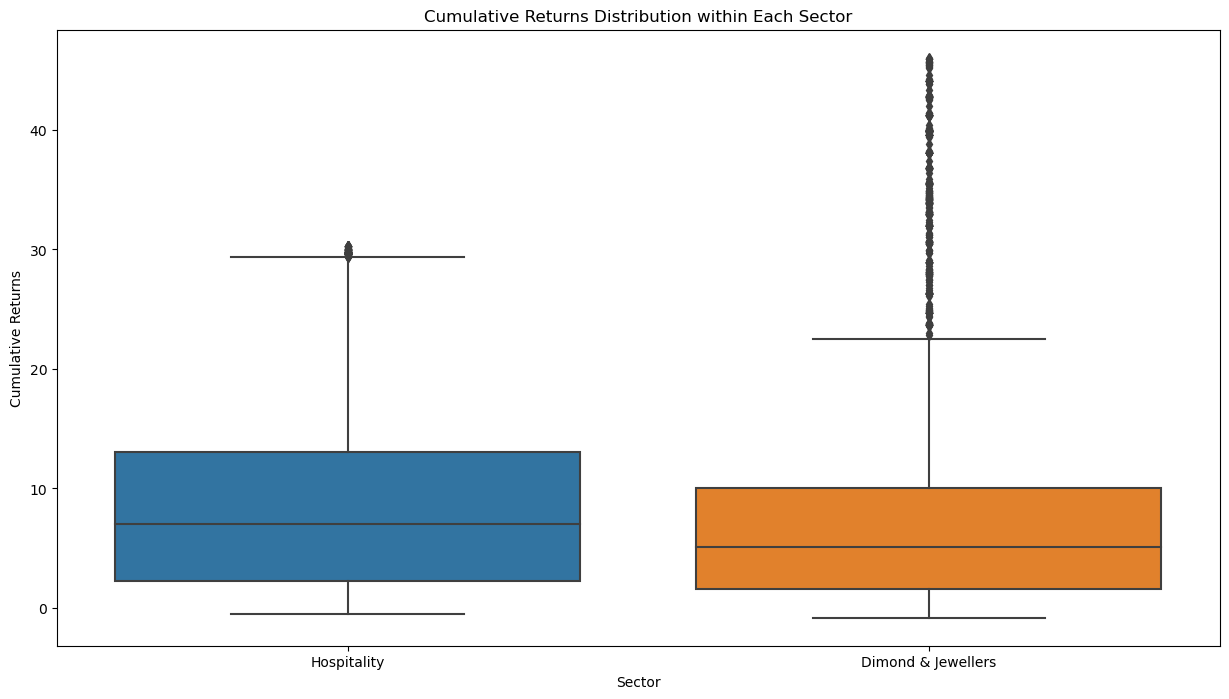

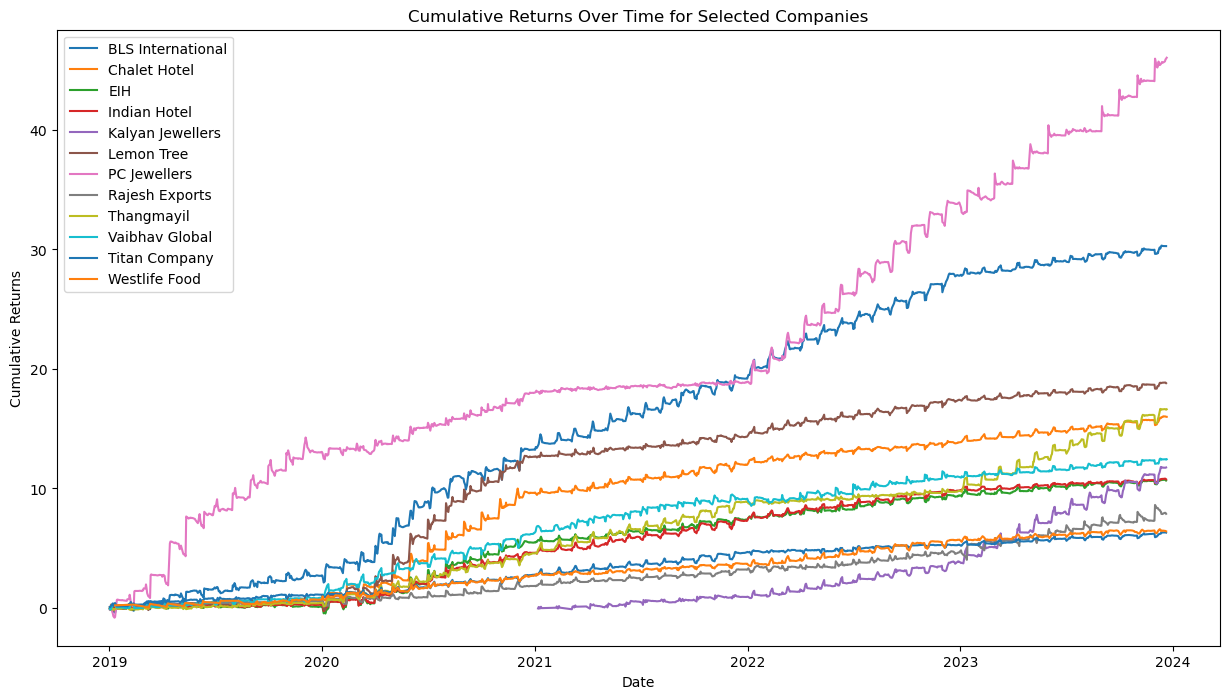

Statistical Summary of Cumulative Returns within Each Sector:


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Dimond & Jewellers,6839.0,7.700171,8.737596,-0.821585,1.621460,5.122795,10.035675,46.041186
Hospitality,7209.0,8.454539,7.288923,-0.471164,2.217851,7.046850,13.072381,30.318396


In [30]:

plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Cumulative_Return', data=df2)
plt.title('Cumulative Returns Distribution within Each Sector')
plt.xlabel('Sector')
plt.ylabel('Cumulative Returns')
plt.show()

# Line chart to compare Cumulative Returns over time for select companies
selected_companies = ['BLS International','Chalet Hotel','EIH','Indian Hotel','Kalyan Jewellers','Lemon Tree','PC Jewellers','Rajesh Exports','Thangmayil','Vaibhav Global','Titan Company','Westlife Food']  # Replace with actual company names
plt.figure(figsize=(15, 8))
for company in selected_companies:
    company_data = df2[df2['Company'] == company]
    plt.plot(company_data['DATE'], company_data['Cumulative_Return'], label=company)

plt.title('Cumulative Returns Over Time for Selected Companies')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Statistical summary to compare mean, median, etc. of Cumulative Returns within each sector
summary_stats = df2.groupby('Category')['Cumulative_Return'].describe()
print("Statistical Summary of Cumulative Returns within Each Sector:")
summary_stats


In [31]:


# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Leaders within Each Category (Top 1)
leaders = df2.groupby('Category').apply(lambda x: x.nlargest(1, 'Cumulative_Return'))

# Display the results
print("Leaders within Each Category:")
print(leaders[['Category', 'Company', 'Cumulative_Return']])


Leaders within Each Category:
                                    Category            Company  \
Category                                                          
Dimond & Jewellers 5611   Dimond & Jewellers       PC Jewellers   
Hospitality        11600         Hospitality  BLS International   

                          Cumulative_Return  
Category                                     
Dimond & Jewellers 5611           46.041186  
Hospitality        11600          30.318396  


In [32]:
# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Laggards within Each Category (Bottom 1)
laggards = df2.groupby('Category').apply(lambda x: x.nsmallest(1, 'Cumulative_Return'))

# Display the results
print("Laggards within Each Category:")
print(laggards[['Category', 'Company', 'Cumulative_Return']])


Laggards within Each Category:
                                   Category       Company  Cumulative_Return
Category                                                                    
Dimond & Jewellers 6660  Dimond & Jewellers  PC Jewellers          -0.821585
Hospitality        8942         Hospitality           EIH          -0.471164


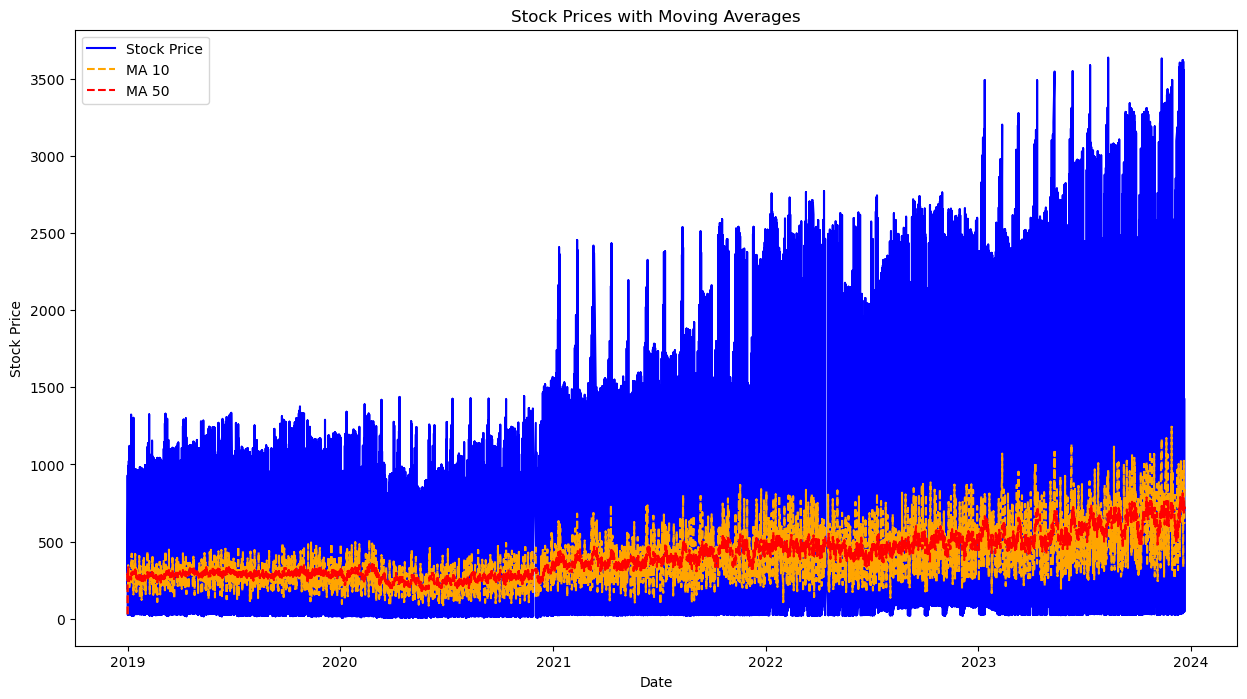

In [33]:

df2['DATE'] = pd.to_datetime(df2['DATE'])
df2 = df2.sort_values(by='DATE')

# Calculate Simple Moving Averages (SMA) for 10 and 50 days
df2['MA_10'] = df2['PRICE'].rolling(window=10, min_periods=1).mean()
df2['MA_50'] = df2['PRICE'].rolling(window=50, min_periods=1).mean()

# Plot the stock prices and moving averages
plt.figure(figsize=(15, 8))
plt.plot(df2['DATE'], df2['PRICE'], label='Stock Price', color='blue')
plt.plot(df2['DATE'], df2['MA_10'], label='MA 10', linestyle='--', color='orange')
plt.plot(df2['DATE'], df2['MA_50'], label='MA 50', linestyle='--', color='red')

plt.title('Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [34]:
df_niftyfifty = pd.read_excel("Final_NSE___Project_dataset (1).xlsx", sheet_name='Nifty 50')
df_niftyfifty 

,Nifty,Date,Price,Open,High,Low,Volume,Chg%
0,Nifty 50,2023-12-20,21150.15,21543.50,21593.00,21087.35,363.89,-0.0141
1,Nifty 50,2023-12-19,21453.10,21477.65,21505.05,21337.75,249.75,0.0016
2,Nifty 50,2023-12-18,21418.65,21434.80,21482.80,21365.35,249.67,-0.0018
3,Nifty 50,2023-12-15,21456.65,21287.45,21492.30,21235.30,508.76,0.0129
4,Nifty 50,2023-12-14,21182.70,21110.40,21210.90,21074.45,334.41,0.0123
...,...,...,...,...,...,...,...,...
1228,Nifty 50,2019-01-07,10771.80,10804.85,10835.95,10750.15,269.37,0.0041
1229,Nifty 50,2019-01-04,10727.35,10699.70,10741.05,10628.65,296.60,0.0052
1230,Nifty 50,2019-01-03,10672.25,10796.80,10814.05,10661.25,286.24,-0.0111
1231,Nifty 50,2019-01-02,10792.50,10868.85,10895.35,10735.05,309.67,-0.0108


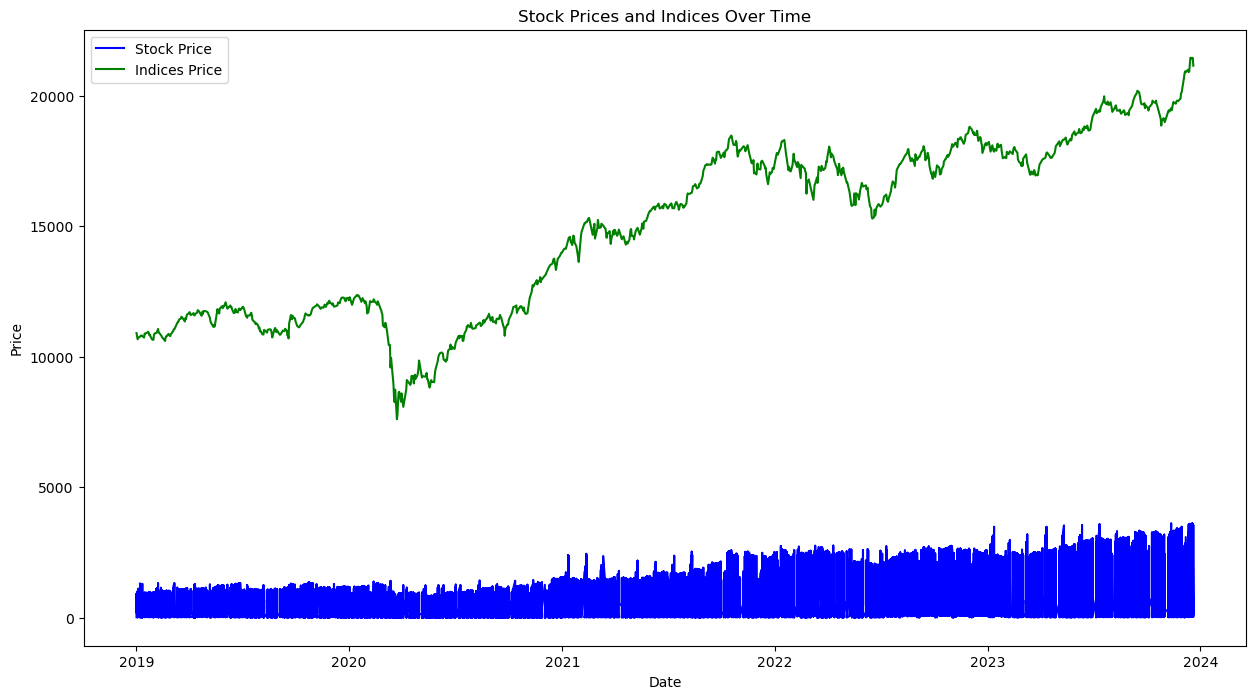

In [35]:

df2['DATE'] = pd.to_datetime(df2['DATE'])
df_niftyfifty['DATE'] = pd.to_datetime(df_niftyfifty['Date'])

# Merge the two DataFrames based on the 'DATE' column
merged_df = pd.merge(df2, df_niftyfifty, on='DATE', how='inner', suffixes=('_stock', '_indices'))

# Plot stock prices and indices over time
plt.figure(figsize=(15, 8))
plt.plot(merged_df['DATE'], merged_df['PRICE'], label='Stock Price', color='blue')
plt.plot(merged_df['DATE'], merged_df['Price'], label='Indices Price', color='green')

plt.title('Stock Prices and Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Company
BLS International    0.216980
Chalet Hotel         0.179719
EIH                  0.137707
Indian Hotel         0.125507
Kalyan Jewellers     0.165501
Lemon Tree           0.187934
PC Jewellers         0.334804
Rajesh Exports       0.127284
Thangmayil           0.145919
Titan Company        0.087286
Vaibhav Global       0.136437
Westlife Food        0.098054
Name: Daily_Return, dtype: float64


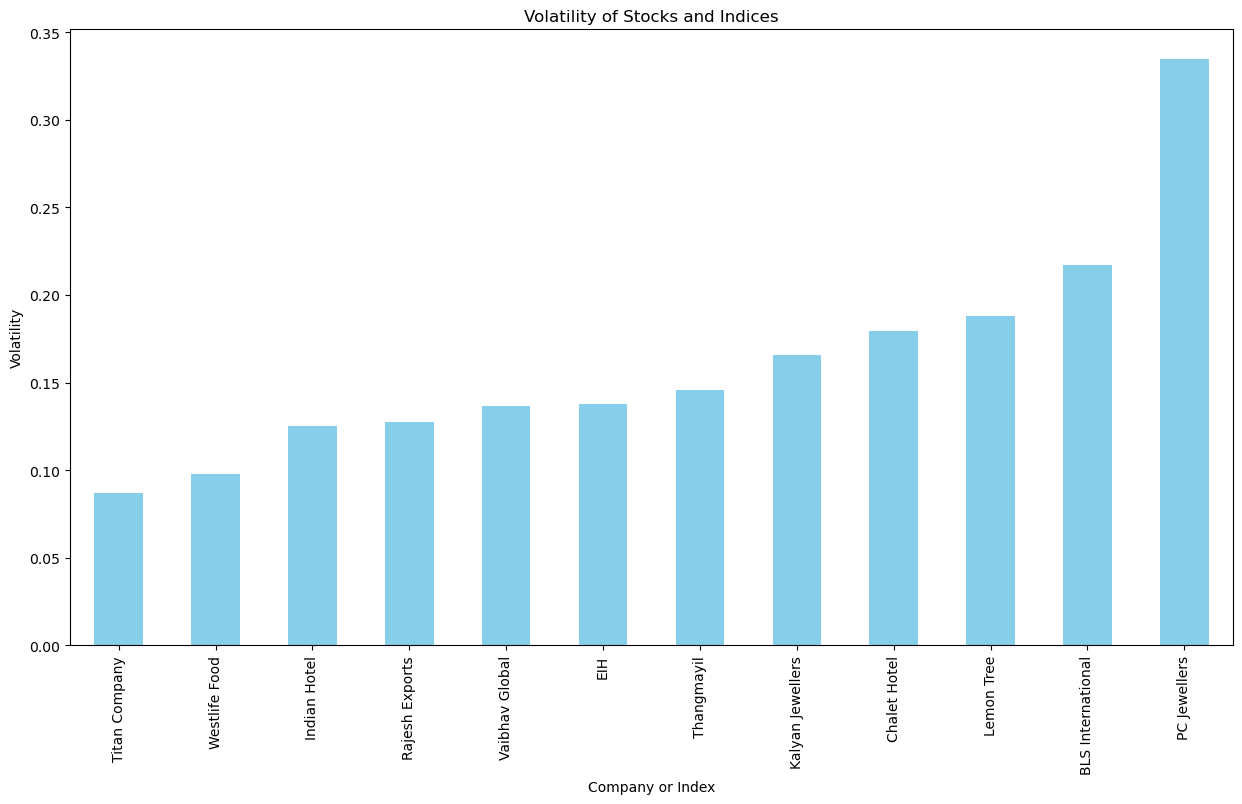

In [36]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate daily returns
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_df = df2.groupby('Company')['Daily_Return'].std()

# Analyze volatility
print(volatility_df)

# Plot volatility
plt.figure(figsize=(15, 8))
volatility_df.sort_values().plot(kind='bar', color='skyblue')
plt.title('Volatility of Stocks and Indices')
plt.xlabel('Company or Index')
plt.ylabel('Volatility')
plt.show()


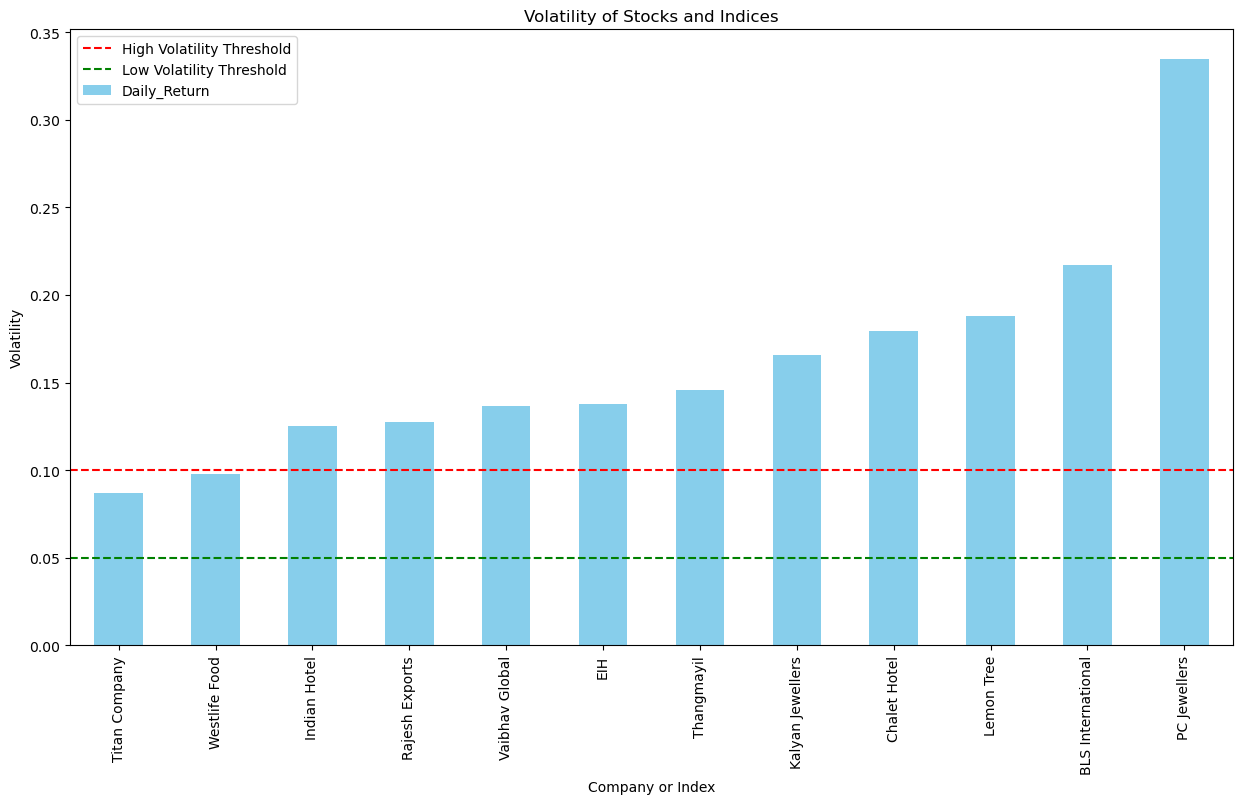

High Volatility Periods: Index(['BLS International', 'Chalet Hotel', 'EIH', 'Indian Hotel',
       'Kalyan Jewellers', 'Lemon Tree', 'PC Jewellers', 'Rajesh Exports',
       'Thangmayil', 'Vaibhav Global'],
      dtype='object', name='Company')
Low Volatility Periods: Index([], dtype='object', name='Company')


In [38]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate daily returns
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_df = df2.groupby('Company')['Daily_Return'].std()

# Set thresholds for high and low volatility
high_volatility_threshold = 0.1  # Adjust the threshold based on your data
low_volatility_threshold = 0.05  # Adjust the threshold based on your data

# Identify periods of high and low volatility
high_volatility_periods = volatility_df[volatility_df > high_volatility_threshold].index
low_volatility_periods = volatility_df[volatility_df < low_volatility_threshold].index

# Plot volatility
plt.figure(figsize=(15, 8))
volatility_df.sort_values().plot(kind='bar', color='skyblue')
plt.title('Volatility of Stocks and Indices')
plt.xlabel('Company or Index')
plt.ylabel('Volatility')

# Highlight high and low volatility periods
plt.axhline(y=high_volatility_threshold, color='red', linestyle='--', label='High Volatility Threshold')
plt.axhline(y=low_volatility_threshold, color='green', linestyle='--', label='Low Volatility Threshold')

plt.legend()
plt.show()

# Print periods of high and low volatility
print(f'High Volatility Periods: {high_volatility_periods}')
print(f'Low Volatility Periods: {low_volatility_periods}')
